In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_1=pd.read_csv('Shoe-Sales.csv',parse_dates=['YearMonth'])

In [3]:
df_1.head()

,YearMonth,Shoe_Sales
0,1980-01-01,85
1,1980-02-01,89
2,1980-03-01,109
3,1980-04-01,95
4,1980-05-01,91


In [4]:
# checking for the most recent date
max(df_1['YearMonth'])

Timestamp('1995-07-01 00:00:00')

In [5]:
# checking for the oldest date
min(df_1['YearMonth'])

Timestamp('1980-01-01 00:00:00')

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    datetime64[ns]
 1   Shoe_Sales  187 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [7]:
df_1.isnull().sum()

YearMonth     0
Shoe_Sales    0
dtype: int64

In [8]:
from pylab import rcParams

In [9]:
# Loading the data as time series



df= pd.read_csv('Shoe-Sales.csv',parse_dates=['YearMonth'],index_col='YearMonth')

In [10]:
df.head()

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


In [11]:
df.describe()

,Shoe_Sales
count,187.000000
mean,245.636364
std,121.390804
min,85.000000
25%,143.500000
50%,220.000000
75%,315.500000
max,662.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


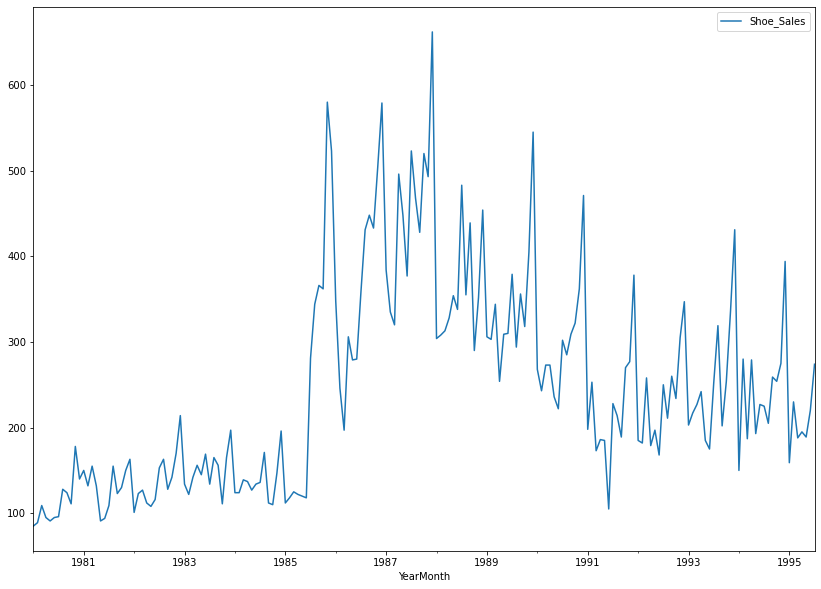

In [13]:
rcParams['figure.figsize']=14,10
df.plot()

plt.show()

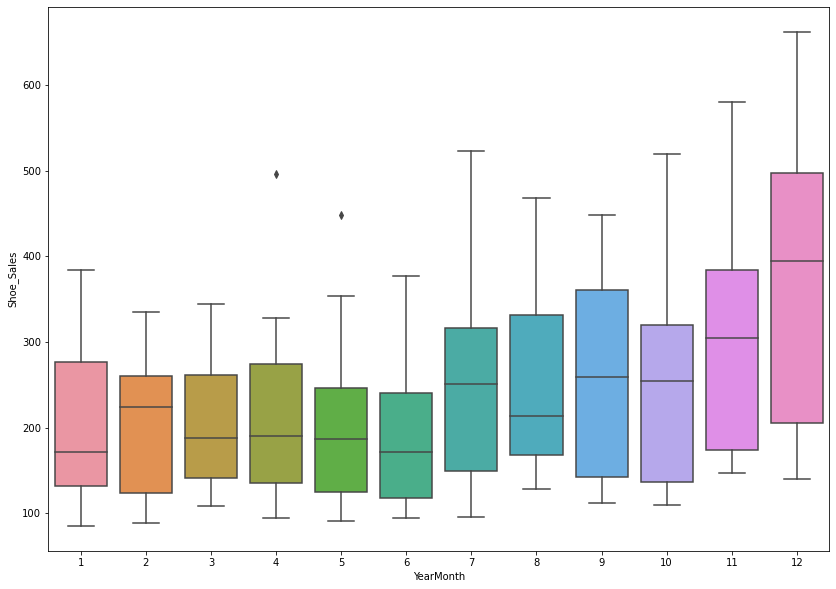

In [14]:
sns.boxplot(x=df.index.month,y=df['Shoe_Sales'])

In [15]:
df.isnull().sum()

Shoe_Sales    0
dtype: int64

In [16]:
# Checking the index function to show values

df['1980-01-01':'1995-07-01'].sum()


Shoe_Sales    45934
dtype: int64

In [17]:
df['1990-07-01':'1995-07-01']

,Shoe_Sales
YearMonth,
1990-07-01,302
1990-08-01,285
1990-09-01,309
1990-10-01,322
1990-11-01,362
...,...
1995-03-01,188
1995-04-01,195
1995-05-01,189


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

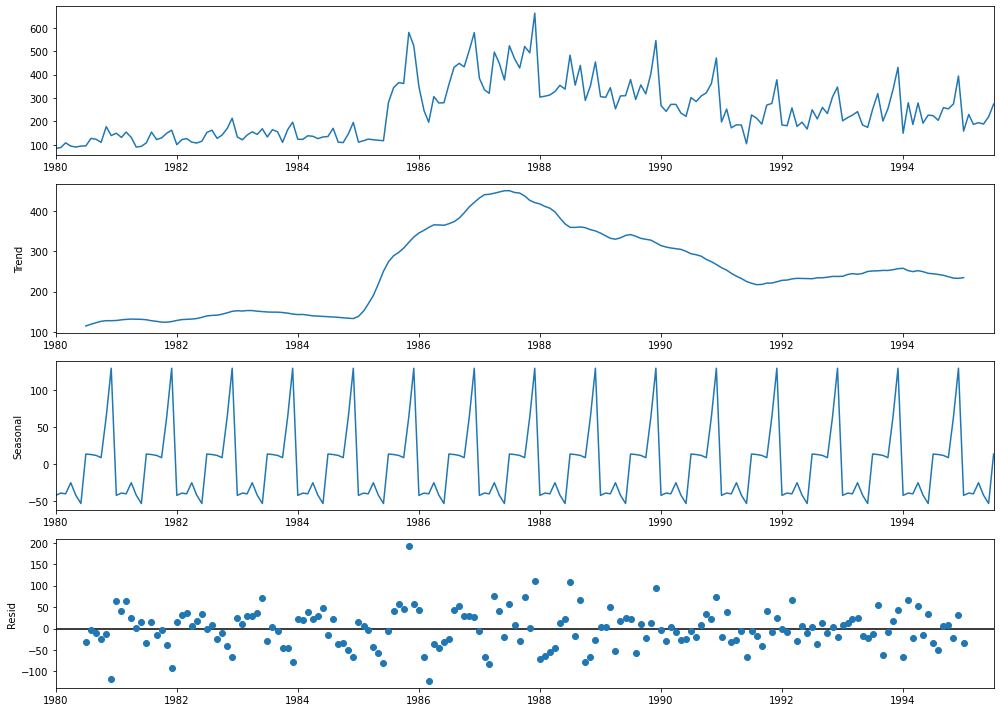

In [19]:
df_decompose_add = seasonal_decompose(df,model='additive', period= 12)
df_decompose_add.plot()
plt.show()

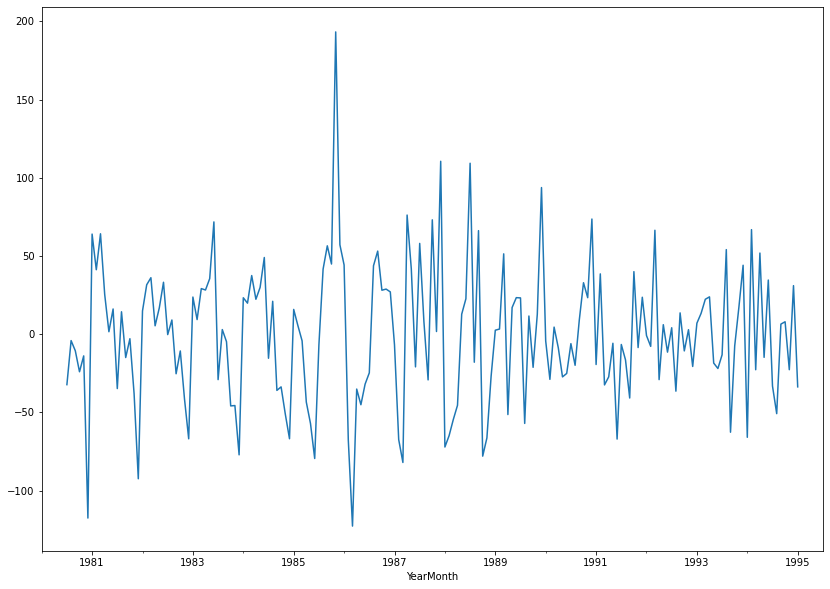

In [20]:
# Checking if tehre is a possible pattern in the error/residual/random

df_decompose_add.resid.plot()

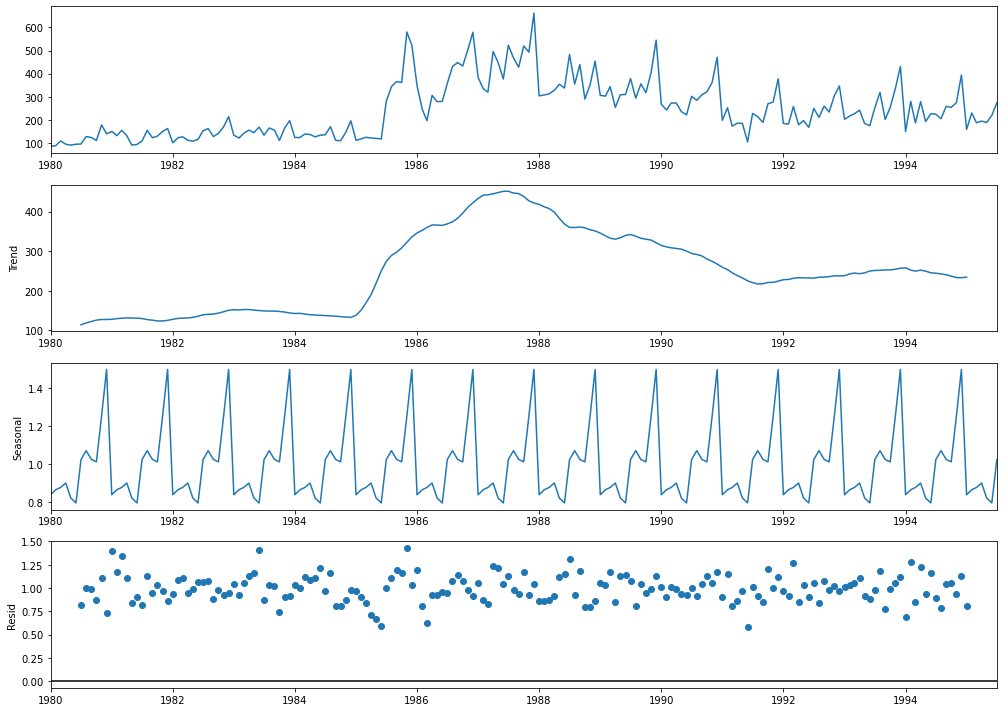

In [21]:
df_decompose_mult = seasonal_decompose(df,model='multiplicative')
df_decompose_mult.plot()
plt.show()

In [22]:
df_log=df.copy()

In [23]:
df_log['Shoe_Sales']=np.log(df)

In [24]:
df_log.Shoe_Sales

YearMonth
1980-01-01    4.442651
1980-02-01    4.488636
1980-03-01    4.691348
1980-04-01    4.553877
1980-05-01    4.510860
                ...   
1995-03-01    5.236442
1995-04-01    5.273000
1995-05-01    5.241747
1995-06-01    5.393628
1995-07-01    5.613128
Name: Shoe_Sales, Length: 187, dtype: float64

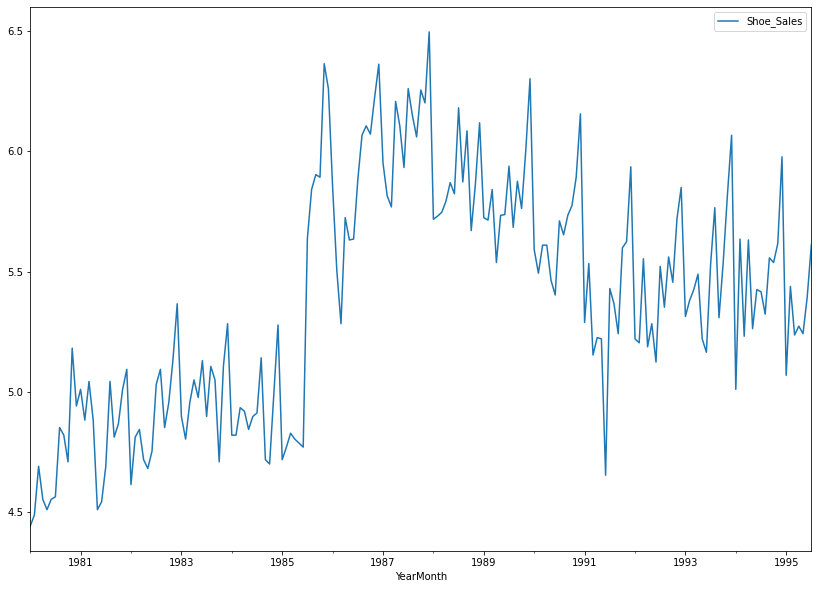

In [25]:
df_log.plot()
plt.show()

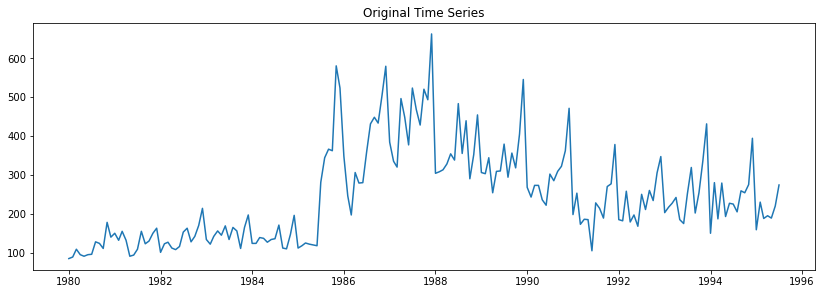

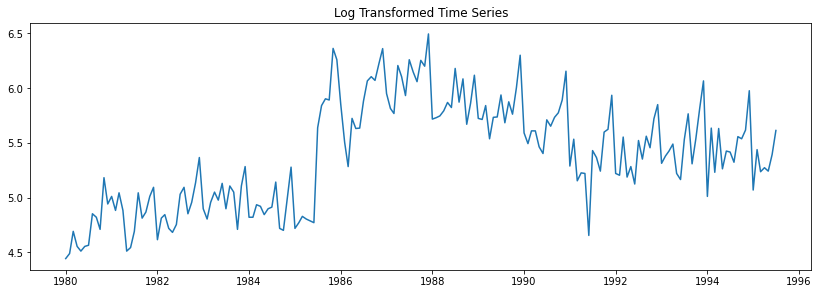

<Figure size 1008x720 with 0 Axes>

In [26]:
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)
plt.show()

plt.subplot(2,1,1)
plt.title('Log Transformed Time Series')
plt.plot(df_log)
plt.show()
plt.tight_layout()


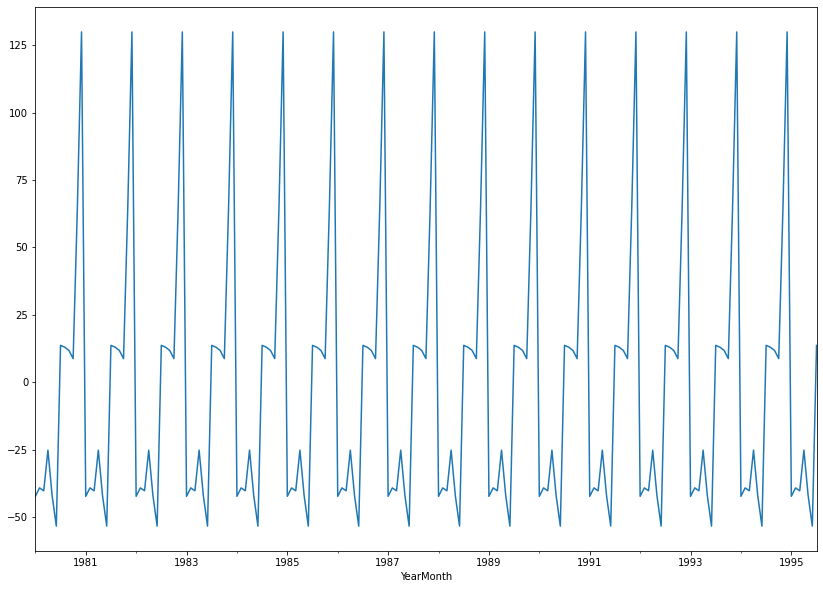

In [27]:
df_decompose_add.seasonal.plot()

In [28]:
df_decompose_add.observed

YearMonth
1980-01-01     85.0
1980-02-01     89.0
1980-03-01    109.0
1980-04-01     95.0
1980-05-01     91.0
              ...  
1995-03-01    188.0
1995-04-01    195.0
1995-05-01    189.0
1995-06-01    220.0
1995-07-01    274.0
Length: 187, dtype: float64

In [29]:
df_decompose_add.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [30]:
df_decompose_add.seasonal

YearMonth
1980-01-01   -42.175463
1980-02-01   -39.062566
1980-03-01   -40.122090
1980-04-01   -25.092328
1980-05-01   -41.878042
                ...    
1995-03-01   -40.122090
1995-04-01   -25.092328
1995-05-01   -41.878042
1995-06-01   -53.208399
1995-07-01    13.741204
Name: seasonal, Length: 187, dtype: float64

In [31]:
df_decompose_add.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

In [32]:
df_decompose_mult.observed

YearMonth
1980-01-01     85.0
1980-02-01     89.0
1980-03-01    109.0
1980-04-01     95.0
1980-05-01     91.0
              ...  
1995-03-01    188.0
1995-04-01    195.0
1995-05-01    189.0
1995-06-01    220.0
1995-07-01    274.0
Length: 187, dtype: float64

In [33]:
df_decompose_mult.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [34]:
df_decompose_mult.seasonal

YearMonth
1980-01-01    0.840405
1980-02-01    0.866682
1980-03-01    0.878675
1980-04-01    0.901826
1980-05-01    0.823141
                ...   
1995-03-01    0.878675
1995-04-01    0.901826
1995-05-01    0.823141
1995-06-01    0.797254
1995-07-01    1.025527
Name: seasonal, Length: 187, dtype: float64

In [35]:
df_decompose_mult.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

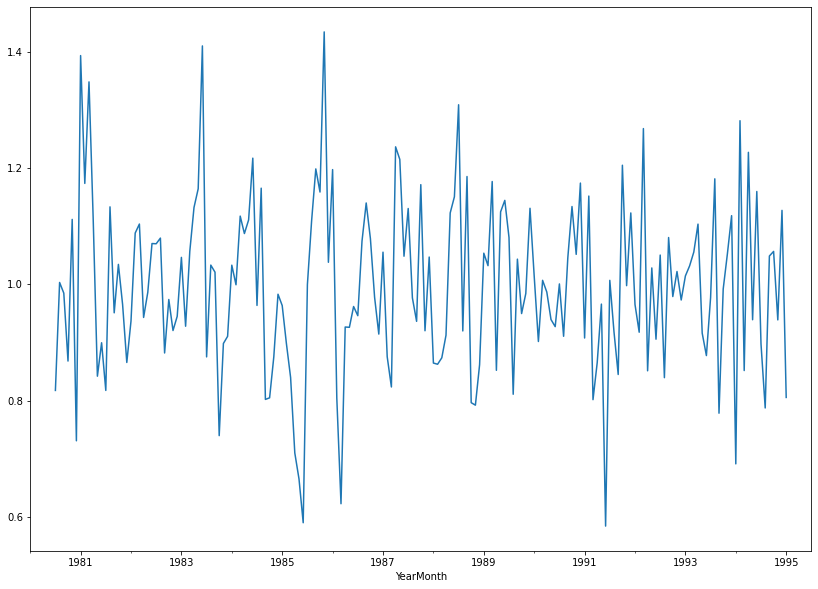

In [36]:
df_decompose_mult.resid.plot()

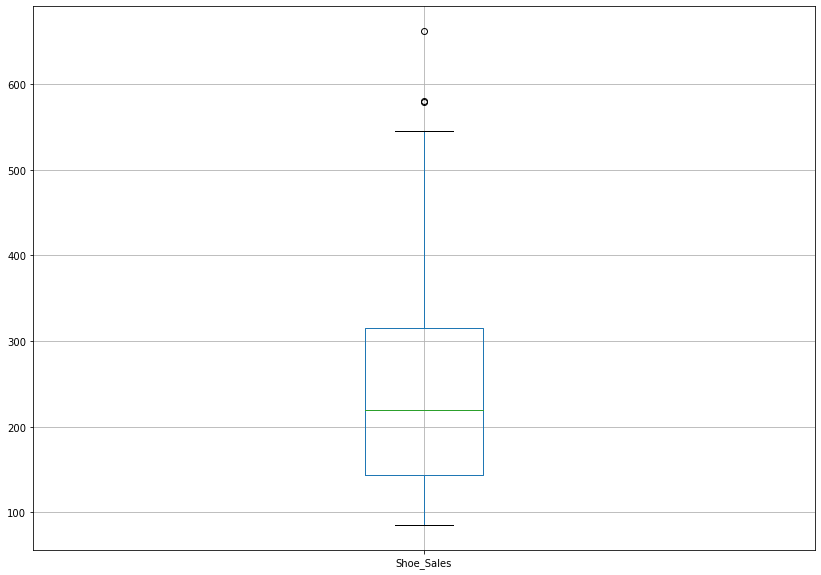

In [37]:
# Series with respect to sales will almost always contain outliers 

df.boxplot()

<ipython-input-38-2700475b2338>:3: MatplotlibDeprecationWarning: Unrecognized location 'Best_Monthly'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='Best_Monthly')


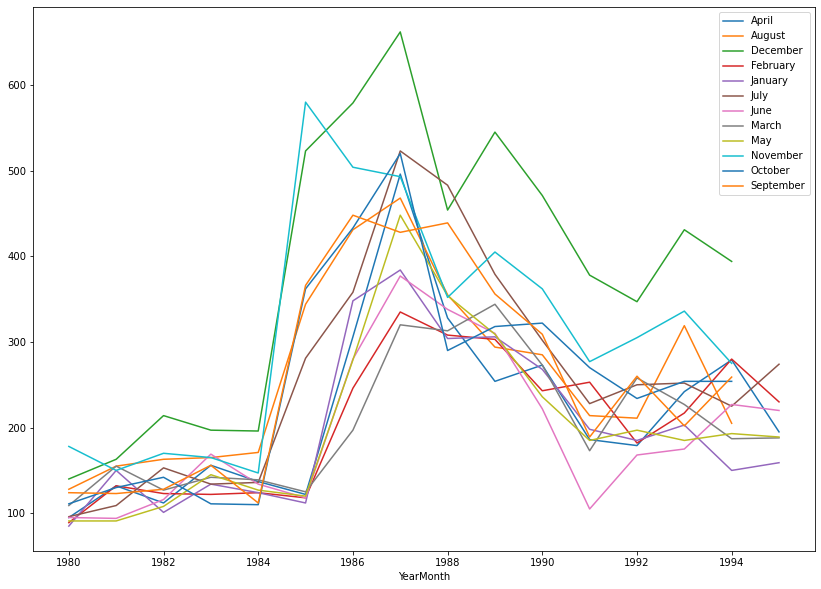

In [38]:
Motnhly_ShoeSales_acrossYears= pd.pivot_table(df,values='Shoe_Sales', columns=df.index.month_name(), index=df.index.year)
Motnhly_ShoeSales_acrossYears.plot()
plt.legend(loc='Best_Monthly')

In [39]:
Motnhly_ShoeSales_acrossYears

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,95.0,128.0,140.0,89.0,85.0,96.0,95.0,109.0,91.0,178.0,111.0,124.0
1981,132.0,155.0,163.0,132.0,150.0,109.0,94.0,155.0,91.0,150.0,130.0,123.0
1982,112.0,163.0,214.0,123.0,101.0,153.0,116.0,127.0,108.0,170.0,142.0,128.0
1983,156.0,165.0,197.0,122.0,134.0,134.0,169.0,142.0,145.0,165.0,111.0,156.0
1984,137.0,171.0,196.0,124.0,124.0,136.0,134.0,139.0,127.0,147.0,110.0,112.0
1985,122.0,344.0,523.0,118.0,112.0,281.0,118.0,125.0,120.0,580.0,362.0,366.0
1986,306.0,431.0,579.0,246.0,348.0,358.0,280.0,197.0,279.0,504.0,433.0,448.0
1987,496.0,468.0,662.0,335.0,384.0,523.0,377.0,320.0,448.0,493.0,520.0,428.0
1988,328.0,355.0,454.0,308.0,304.0,483.0,338.0,313.0,354.0,352.0,290.0,439.0


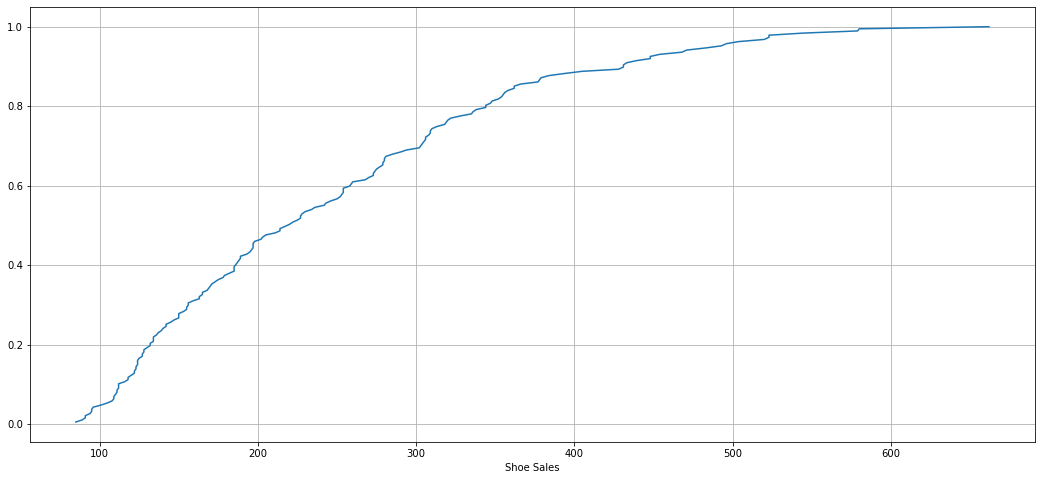

In [40]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Shoe_Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Shoe Sales');

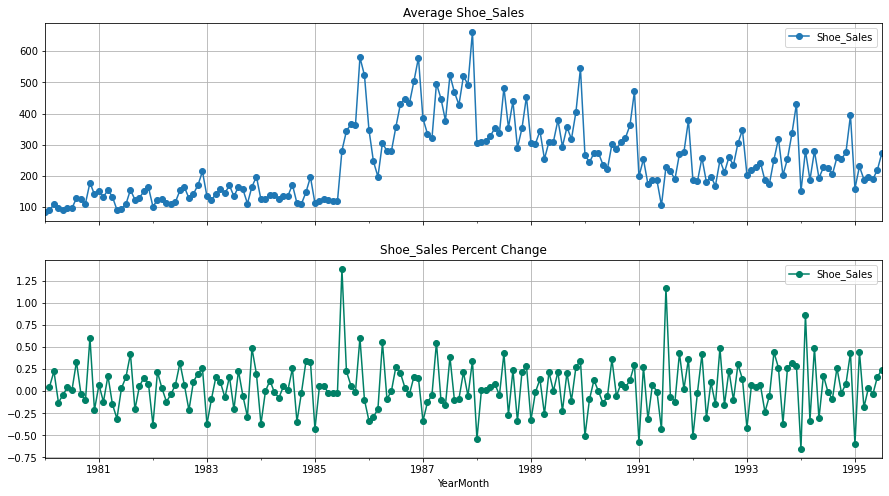

In [41]:
average    = df.groupby(df.index)["Shoe_Sales"].mean()
pct_change = df.groupby(df.index)["Shoe_Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Shoe_Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Shoe_Sales Percent Change",grid=True)


In [42]:
train= df[df.index<='12-01-1990']
test =df[df.index>'12-01-1990']

In [43]:
display(train)

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91
...,...
1990-08-01,285
1990-09-01,309
1990-10-01,322


In [44]:
display(test)

,Shoe_Sales
YearMonth,
1991-01-01,198
1991-02-01,253
1991-03-01,173
1991-04-01,186
1991-05-01,185
1991-06-01,105
1991-07-01,228
1991-08-01,214
1991-09-01,189


In [45]:
len(train)

132

In [46]:
len(test)

55

In [47]:
total=132+55
total

187

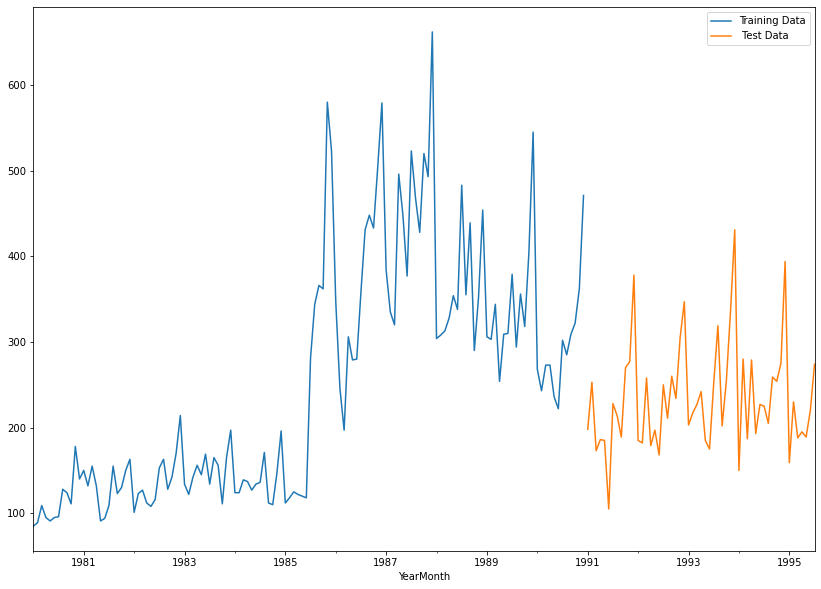

In [48]:
train['Shoe_Sales'].plot()
test['Shoe_Sales'].plot()
plt.legend(['Training Data',' Test Data'])
plt.show()

In [49]:
# Regression Models for the sales= f(time)

# add a column to include the time value since we earlier indexed the time value.

train_time =[i+1 for i in range(len(train))]
test_time=[i+1 for i in range (len(test))]



In [50]:
LinearRegression_train=train.copy()
LinearRegression_test=test.copy()

In [51]:
LinearRegression_train['time']=train_time
LinearRegression_test['time']=test_time

In [52]:
# LinearRegression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [53]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'].values)

LinearRegression()

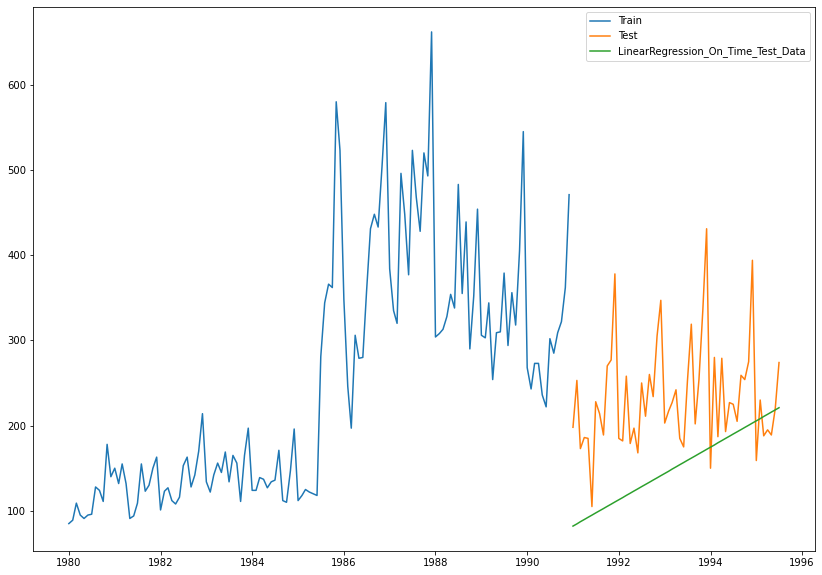

In [54]:
test_predictions_model1=lr.predict(LinearRegression_test[['time']])

LinearRegression_test['RgonTime']=test_predictions_model1

plt.plot(train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'],label='Test')
plt.plot(LinearRegression_test['RgonTime'], label='LinearRegression_On_Time_Test_Data')
plt.legend(loc='best')
plt.show()


In [55]:
from sklearn import metrics

In [56]:
rmse_model1_test=metrics.mean_squared_error(test['Shoe_Sales'], test_predictions_model1, squared=False)
print('Regression Model1 RMSE is %3.3f'%(rmse_model1_test))

Regression Model1 RMSE is 106.984


In [57]:
resultsDF= pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Regression On Time'])
resultsDF

,Test RMSE
Regression On Time,106.983524


In [58]:
# Naive Based Approach

naivemodel_train=train.copy()
naivemodel_test=test.copy()

naivemodel_test['naive']=np.array(train['Shoe_Sales'])[len(np.array(train['Shoe_Sales']))-1]
naivemodel_test['naive'].head()

YearMonth
1991-01-01    471
1991-02-01    471
1991-03-01    471
1991-04-01    471
1991-05-01    471
Name: naive, dtype: int64

Text(0.5, 1.0, 'Naive Forecast')

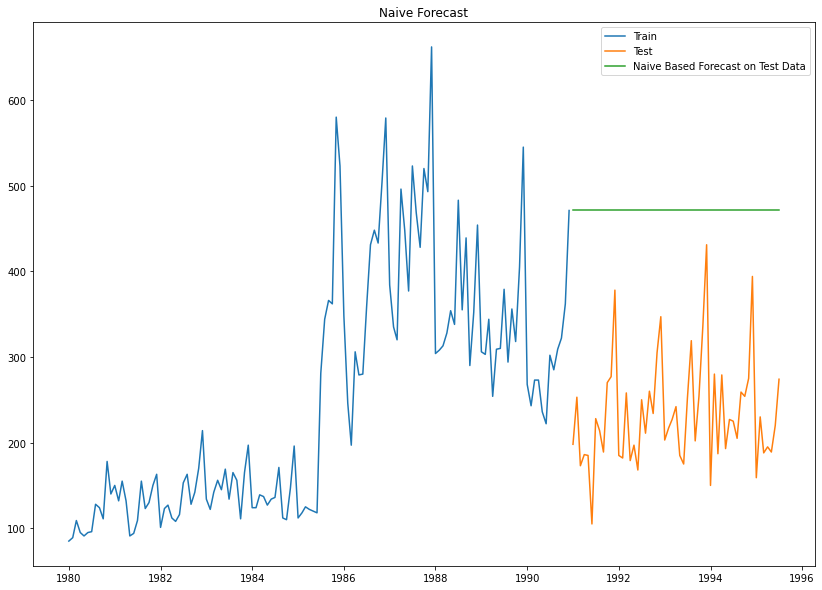

In [59]:
plt.plot(naivemodel_train['Shoe_Sales'],label='Train')
plt.plot(naivemodel_test['Shoe_Sales'],label='Test')
plt.plot(naivemodel_test['naive'],label='Naive Based Forecast on Test Data')
plt.legend(loc='best')
plt.title('Naive Forecast')

In [60]:
rmse_model2_test=metrics.mean_squared_error(test['Shoe_Sales'],naivemodel_test['naive'],squared=False)
print('Naive Model2 RMSE is %3.3f'%(rmse_model2_test))

Naive Model2 RMSE is 245.121


In [61]:
resultsDF_2= pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])
resultsDF_2

,Test RMSE
Naive Model,245.121306


In [62]:
resultsDF=pd.concat([resultsDF,resultsDF_2])

In [63]:
resultsDF

,Test RMSE
Regression On Time,106.983524
Naive Model,245.121306


In [64]:
# Simple Average

simpleavg_train= train.copy()
simpleavg_test=test.copy()

simpleavg_test['simpleaveg_forecast']=train['Shoe_Sales'].mean()
simpleavg_test

,Shoe_Sales,simpleaveg_forecast
YearMonth,,
1991-01-01,198,250.575758
1991-02-01,253,250.575758
1991-03-01,173,250.575758
1991-04-01,186,250.575758
1991-05-01,185,250.575758
1991-06-01,105,250.575758
1991-07-01,228,250.575758
1991-08-01,214,250.575758
1991-09-01,189,250.575758


Text(0.5, 1.0, 'Simple Average')

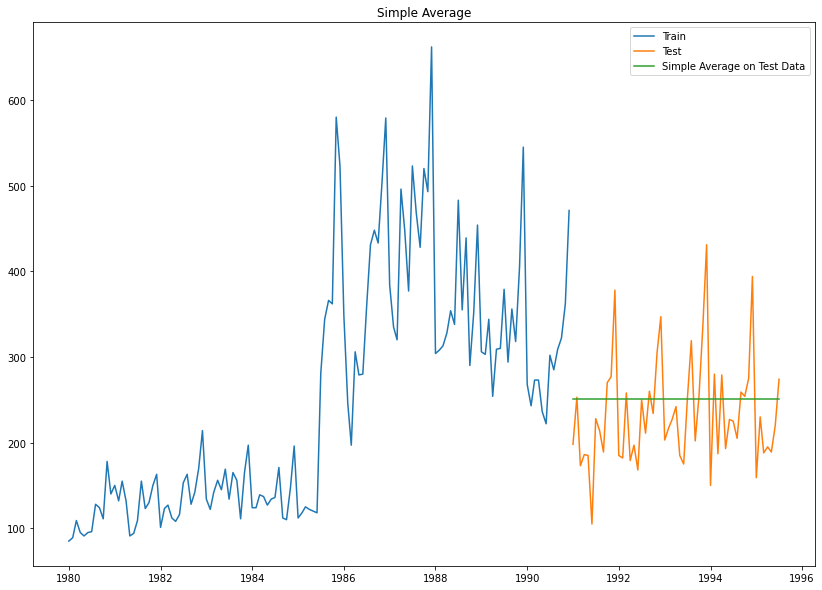

In [65]:
plt.plot(simpleavg_train['Shoe_Sales'],label='Train')
plt.plot(simpleavg_test['Shoe_Sales'],label='Test')
plt.plot(simpleavg_test['simpleaveg_forecast'],label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title('Simple Average')

In [66]:
rmse_model3_test=metrics.mean_squared_error(test['Shoe_Sales'],simpleavg_test['simpleaveg_forecast'],squared=False)
print('Simple Average RMSE is %3.3f'%(rmse_model3_test))

Simple Average RMSE is 63.985


In [67]:
resultsDF_3= pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])
resultsDF_3

,Test RMSE
Simple Average Model,63.98457


In [68]:
resultsDF=pd.concat([resultsDF_3,resultsDF])

In [69]:
resultsDF

,Test RMSE
Simple Average Model,63.984570
Regression On Time,106.983524
Naive Model,245.121306


In [70]:
MovingAverage=df.copy()
MovingAverage.head()

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


In [71]:
MovingAverage['Trailing_2'] = MovingAverage['Shoe_Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Shoe_Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Shoe_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Shoe_Sales'].rolling(9).mean()

MovingAverage.head(20)

,Shoe_Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,85,NaN,NaN,NaN,NaN
1980-02-01,89,87.0,NaN,NaN,NaN
1980-03-01,109,99.0,NaN,NaN,NaN
1980-04-01,95,102.0,94.50,NaN,NaN
1980-05-01,91,93.0,96.00,NaN,NaN
1980-06-01,95,93.0,97.50,94.000000,NaN
1980-07-01,96,95.5,94.25,95.833333,NaN
1980-08-01,128,112.0,102.50,102.333333,NaN
1980-09-01,124,126.0,110.75,104.833333,101.333333


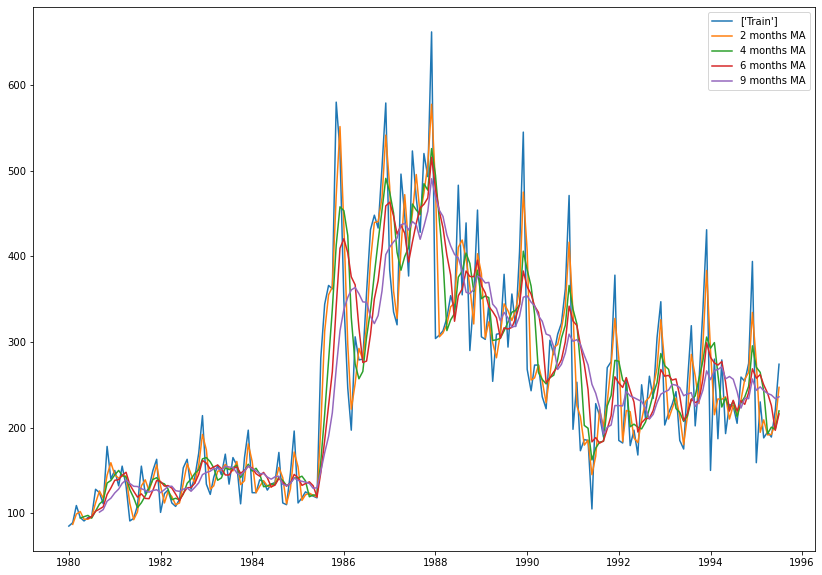

In [72]:
plt.plot(MovingAverage['Shoe_Sales'], Label=['Train'])
plt.plot(MovingAverage['Trailing_2'], label ='2 months MA')
plt.plot(MovingAverage['Trailing_4'], label= '4 months MA')
plt.plot(MovingAverage['Trailing_6'], label='6 months MA')
plt.plot(MovingAverage['Trailing_9'],label='9 months MA')
plt.legend(loc='best')


In [73]:
MovingAverage_train=MovingAverage[MovingAverage.index<='12-01-1990']
MovingAverage_test=MovingAverage[MovingAverage.index>'12-01-1990']


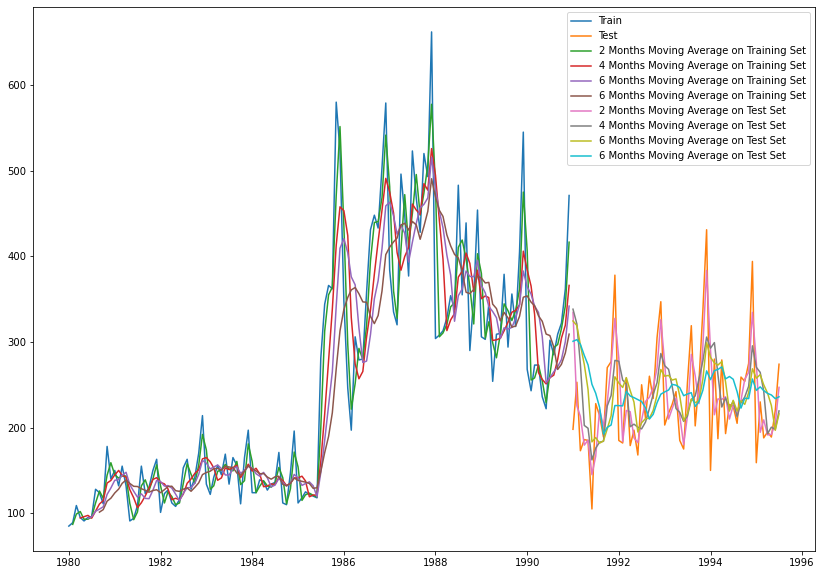

In [74]:
plt.plot(MovingAverage_train['Shoe_Sales'],label='Train')
plt.plot(MovingAverage_test['Shoe_Sales'],label='Test')
plt.plot(MovingAverage_train['Trailing_2'], label='2 Months Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_4'], label='4 Months Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_6'], label='6 Months Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_9'], label='6 Months Moving Average on Training Set')

plt.plot(MovingAverage_test['Trailing_2'], label='2 Months Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_4'], label='4 Months Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_6'], label='6 Months Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_9'], label='6 Months Moving Average on Test Set')

plt.legend(loc='best')



In [75]:
rmse_model4_test=metrics.mean_squared_error(test['Shoe_Sales'],MovingAverage_test['Shoe_Sales'],squared=False)
print('Moving Average RMSE is %3.3f'%(rmse_model4_test))


Moving Average RMSE is 0.000


In [76]:
rmse_model5_test=metrics.mean_squared_error(test['Shoe_Sales'],MovingAverage_test['Trailing_2'],squared=False)
print('Moving Average 2 months RMSE is %3.3f'%(rmse_model5_test))

Moving Average 2 months RMSE is 45.949


In [77]:
rmse_model6_test=metrics.mean_squared_error(test['Shoe_Sales'],MovingAverage_test['Trailing_4'],squared=False)
print('Moving Average 4 months RMSE is %3.3f'%(rmse_model6_test))

rmse_model7_test=metrics.mean_squared_error(test['Shoe_Sales'],MovingAverage_test['Trailing_6'],squared=False)
print('Moving Average 6 months RMSE is %3.3f'%(rmse_model7_test))

rmse_model8_test=metrics.mean_squared_error(test['Shoe_Sales'],MovingAverage_test['Trailing_9'],squared=False)
print('Moving Average 4 months RMSE is %3.3f'%(rmse_model8_test))

Moving Average 4 months RMSE is 57.873
Moving Average 6 months RMSE is 63.457
Moving Average 4 months RMSE is 67.724


In [78]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model5_test,rmse_model6_test
                                          ,rmse_model7_test,rmse_model8_test]}
                           ,index=['2_Months_MA','4_Months_MA'
                                   ,'6_Months_MA','9_Months_MA'])

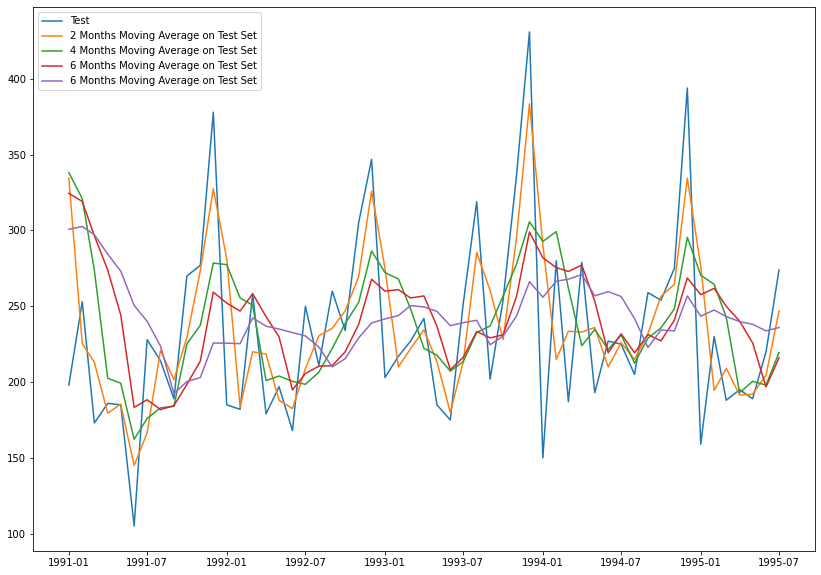

In [79]:
plt.plot(MovingAverage_test['Shoe_Sales'],label='Test')
plt.plot(MovingAverage_test['Trailing_2'], label='2 Months Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_4'], label='4 Months Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_6'], label='6 Months Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_9'], label='6 Months Moving Average on Test Set')
plt.legend(loc='best')


In [80]:
resultsDf_4

,Test RMSE
2_Months_MA,45.948736
4_Months_MA,57.872686
6_Months_MA,63.456893
9_Months_MA,67.723648


In [81]:
resultsDF=pd.concat([resultsDF,resultsDf_4])

In [82]:
resultsDF

,Test RMSE
Simple Average Model,63.984570
Regression On Time,106.983524
Naive Model,245.121306
2_Months_MA,45.948736
4_Months_MA,57.872686
6_Months_MA,63.456893
9_Months_MA,67.723648


In [83]:
# Simple Exponential Smoothing

ses_train=train.copy()
ses_test=test.copy()

In [84]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt

In [85]:
model_ses=SimpleExpSmoothing(ses_train['Shoe_Sales'])

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [86]:
model_ses_autofit=model_ses.fit(optimized= True)

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [87]:
model_ses_autofit.params

{'smoothing_level': 0.6050522579370422,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 88.82835418128728,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
ses_test['predict']=model_ses_autofit.forecast(steps=len(test))
ses_test.head()

,Shoe_Sales,predict
YearMonth,,
1991-01-01,198,420.230325
1991-02-01,253,420.230325
1991-03-01,173,420.230325
1991-04-01,186,420.230325
1991-05-01,185,420.230325


Text(0.5, 1.0, 'Alpha =0.605 Forecast')

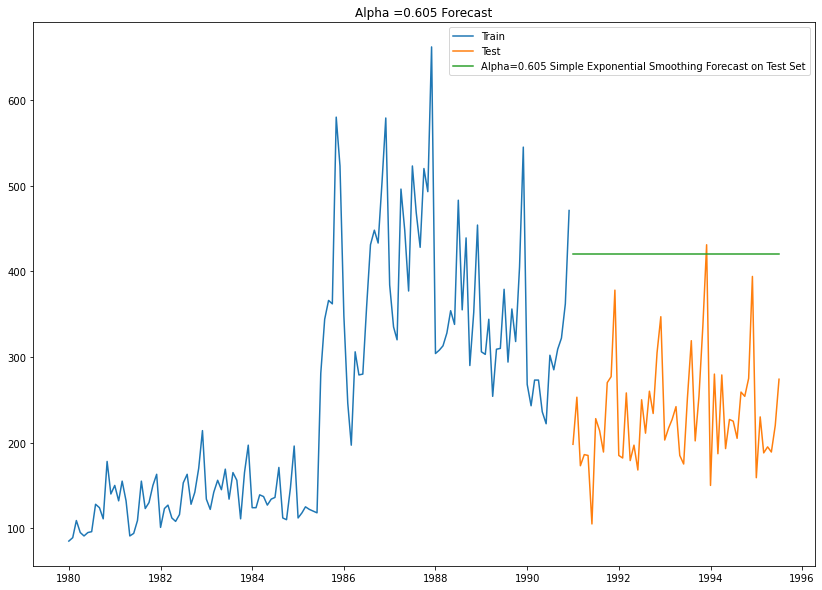

In [89]:
plt.plot(ses_train['Shoe_Sales'], label='Train')
plt.plot(ses_test['Shoe_Sales'],label='Test')
plt.plot(ses_test['predict'],label= 'Alpha=0.605 Simple Exponential Smoothing Forecast on Test Set' )
plt.legend(loc='best')
plt.title('Alpha =0.605 Forecast')


In [90]:
rmse_model9_test= metrics.mean_squared_error(ses_test['Shoe_Sales'],ses_test['predict'], squared= False)
print('Simple Exponential Smoothing RMSE is  %3.3f'%(rmse_model9_test))


Simple Exponential Smoothing RMSE is  196.405


In [91]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model9_test]},index=['Alpha= 0.605,Simple Exponential Smoothing'])
resultsDf_5

,Test RMSE
"Alpha= 0.605,Simple Exponential Smoothing",196.405281


In [92]:
resultsDF=pd.concat([resultsDF, resultsDf_5])

In [93]:
resultsDF

,Test RMSE
Simple Average Model,63.984570
Regression On Time,106.983524
Naive Model,245.121306
2_Months_MA,45.948736
4_Months_MA,57.872686
6_Months_MA,63.456893
9_Months_MA,67.723648
"Alpha= 0.605,Simple Exponential Smoothing",196.405281


In [94]:
# Double Exponential Smoothing

des_train=train.copy()
des_test= test.copy()

In [95]:
des_model=Holt(des_train['Shoe_Sales'])

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [96]:
model_des_autofit=des_model.fit()

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [97]:
model_des_autofit.params

{'smoothing_level': 0.5995866515066276,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 82.72347254072608,
 'initial_slope': 2.56946913837653,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [98]:
des_test['predict']=model_des_autofit.forecast(steps=len(test))
des_test.head()

,Shoe_Sales,predict
YearMonth,,
1991-01-01,198,423.669827
1991-02-01,253,426.239296
1991-03-01,173,428.808765
1991-04-01,186,431.378234
1991-05-01,185,433.947703


Text(0.5, 1.0, 'Alpha=0.599, Beta=0.0 Holt Forecast')

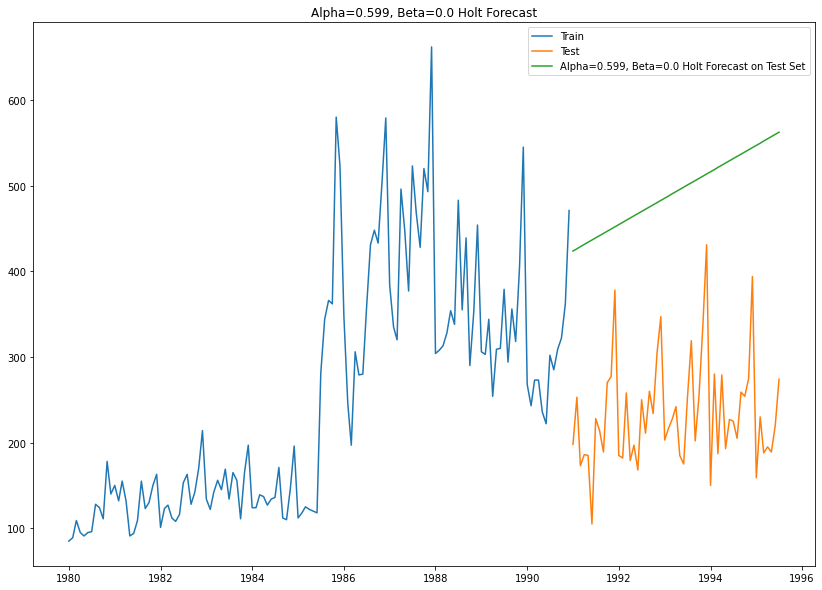

In [99]:
plt.plot(des_train['Shoe_Sales'], label='Train')
plt.plot(des_test['Shoe_Sales'],label='Test')
plt.plot(des_test['predict'],label= 'Alpha=0.599, Beta=0.0 Holt Forecast on Test Set' )
plt.legend(loc='best')
plt.title('Alpha=0.599, Beta=0.0 Holt Forecast')

In [100]:
rmse_model11_test= metrics.mean_squared_error(des_test['Shoe_Sales'],des_test['predict'], squared= False)
print('Holt Exponential Smoothing RMSE is  %3.3f'%(rmse_model11_test))

Holt Exponential Smoothing RMSE is  268.131


In [101]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model11_test]},index=['Holt (Double) Exponential Smoothing'])
resultsDf_6

,Test RMSE
Holt (Double) Exponential Smoothing,268.131008


In [102]:
resultsDF=pd.concat([resultsDF, resultsDf_6])

In [103]:
resultsDF

,Test RMSE
Simple Average Model,63.984570
Regression On Time,106.983524
Naive Model,245.121306
2_Months_MA,45.948736
4_Months_MA,57.872686
6_Months_MA,63.456893
9_Months_MA,67.723648
"Alpha= 0.605,Simple Exponential Smoothing",196.405281
Holt (Double) Exponential Smoothing,268.131008


In [104]:
# Triple Exponential Smmothing

tes_train=train.copy()
tes_test=test.copy()


In [105]:
model_TES = ExponentialSmoothing(tes_train['Shoe_Sales'],trend='additive', seasonal='multiplicative')
model_TES_autofit = model_TES.fit()

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [106]:
model_TES_autofit.params

{'smoothing_level': 0.5721127531485367,
 'smoothing_slope': 2.5327809963162603e-29,
 'smoothing_seasonal': 1.3351654982271638e-26,
 'damping_slope': nan,
 'initial_level': 210.53173992496332,
 'initial_slope': 3.0985150907563757,
 'initial_seasons': array([0.42080274, 0.38184064, 0.39650599, 0.43716065, 0.42655794,
        0.40578307, 0.5346963 , 0.50219215, 0.52546077, 0.503657  ,
        0.60459188, 0.71636921]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [107]:
tes_test['auto_predict']=model_TES_autofit.forecast(steps=len(test))
tes_test.head()

,Shoe_Sales,auto_predict
YearMonth,,
1991-01-01,198,269.508571
1991-02-01,253,245.737932
1991-03-01,173,256.404564
1991-04-01,186,284.048854
1991-05-01,185,278.481353


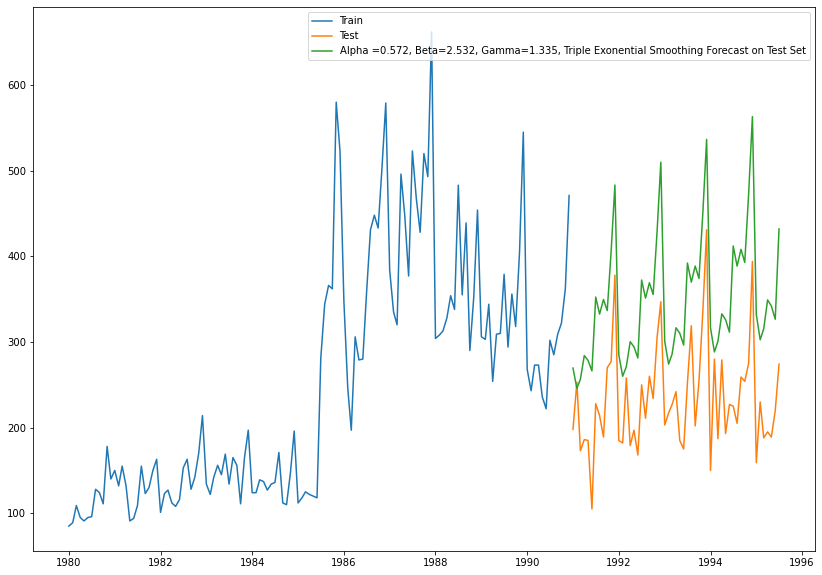

In [108]:
plt.plot(tes_train['Shoe_Sales'], label='Train')
plt.plot(tes_test['Shoe_Sales'],label='Test')

plt.plot(tes_test['auto_predict'],label= 'Alpha =0.572, Beta=2.532, Gamma=1.335, Triple Exonential Smoothing Forecast on Test Set')
plt.legend(loc='best')


In [109]:
rmse_model13_test=metrics.mean_squared_error(tes_test['Shoe_Sales'],tes_test['auto_predict'], squared=False)
print ('Alpha =0.572, Beta=2.532, Gamma=1.335 Triple Exponential Smoothing RMSE is %3.3f'%(rmse_model13_test))

Alpha =0.572, Beta=2.532, Gamma=1.335 Triple Exponential Smoothing RMSE is 122.822


In [110]:
resultsDf_9= pd.DataFrame({'Test RMSE': [rmse_model13_test]}
                           ,index=['lpha =0.572, Beta=2.532, Gamma=1.335,TripleExponentialSmoothing'])

resultsDF=pd.concat([resultsDF, resultsDf_9])

In [111]:
resultsDF

,Test RMSE
Simple Average Model,63.984570
Regression On Time,106.983524
Naive Model,245.121306
2_Months_MA,45.948736
4_Months_MA,57.872686
6_Months_MA,63.456893
9_Months_MA,67.723648
"Alpha= 0.605,Simple Exponential Smoothing",196.405281
Holt (Double) Exponential Smoothing,268.131008
"lpha =0.572, Beta=2.532, Gamma=1.335,TripleExponentialSmoothing",122.822187


In [112]:
from statsmodels.tsa.stattools import adfuller

dftest= adfuller(df,regression='ct')
print ('Dickey Fuller Test Statisitics is %3.3f'%dftest[0])
print ('Dickey Fuller Test p_value is ',dftest[1])
print ('Number of Lags used',dftest[2])

Dickey Fuller Test Statisitics is -1.577
Dickey Fuller Test p_value is  0.8014186234536533
Number of Lags used 13


In [113]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

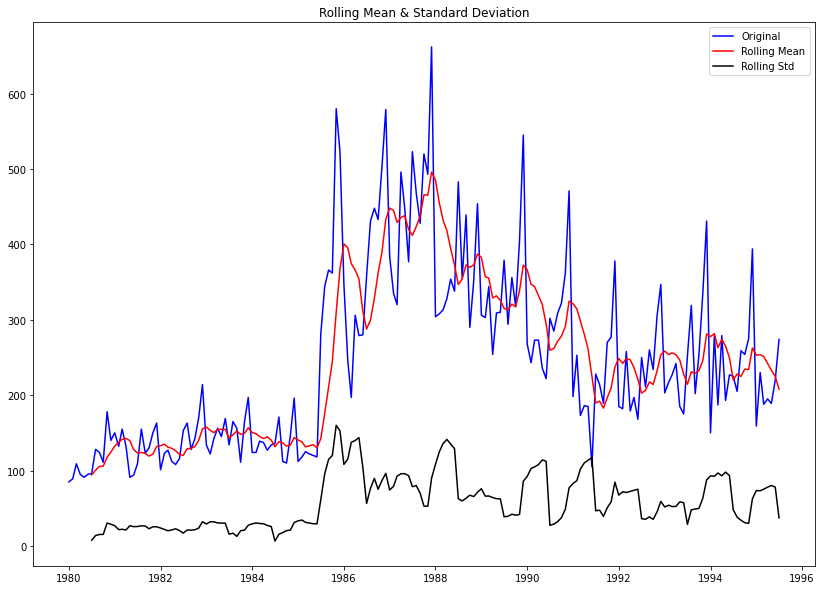

Results of Dickey-Fuller Test:
Test Statistic                  -1.717397
p-value                          0.422172
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [114]:
test_stationarity(df['Shoe_Sales'])

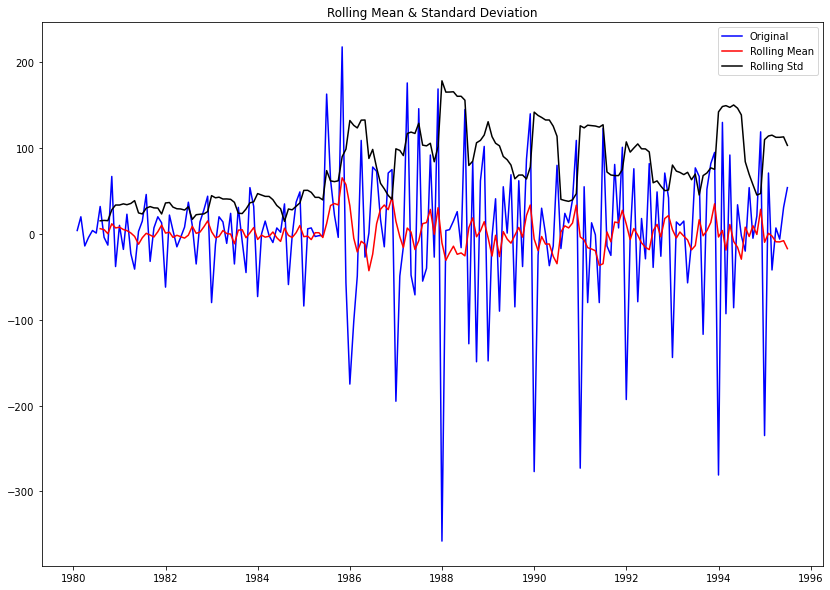

Results of Dickey-Fuller Test:
Test Statistic                  -3.479160
p-value                          0.008539
#Lags Used                      12.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [115]:
test_stationarity(df['Shoe_Sales'].diff().dropna())

In [116]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [117]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [118]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Shoe_Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1510.0865140837898
ARIMA(0, 1, 1) - AIC:1498.6078707987585
ARIMA(0, 1, 2) - AIC:1496.135095908347
ARIMA(1, 1, 0) - AIC:1503.3488365275712
ARIMA(1, 1, 1) - AIC:1493.25506214314
ARIMA(1, 1, 2) - AIC:1495.154087019332
ARIMA(2, 1, 0) - AIC:1500.5665891270846
ARIMA(2, 1, 1) - AIC:1495.1680882174983
ARIMA(2, 1, 2) - AIC:1497.134601216152


In [119]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
4,"(1, 1, 1)",1493.255062
5,"(1, 1, 2)",1495.154087
7,"(2, 1, 1)",1495.168088
2,"(0, 1, 2)",1496.135096
8,"(2, 1, 2)",1497.134601
1,"(0, 1, 1)",1498.607871
6,"(2, 1, 0)",1500.566589
3,"(1, 1, 0)",1503.348837
0,"(0, 1, 0)",1510.086514


In [120]:
auto_ARIMA = ARIMA(train['Shoe_Sales'],order= (1,1,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Shoe_Sales   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -742.628
Method:                       css-mle   S.D. of innovations             69.968
Date:                Sat, 14 Aug 2021   AIC                           1493.255
Time:                        20:39:47   BIC                           1504.756
Sample:                    02-01-1980   HQIC                          1497.928
                         - 12-01-1990                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.0863      1.798      1.160      0.246      -1.438       5.611
ar.L1.D.Shoe_Sales     0.4827      0.119      4.064      0.000       0.250       0.716
ma.L1.D.Shoe_Sales  

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [121]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [122]:
rmse_Arima1= metrics.mean_squared_error(test['Shoe_Sales'], predicted_auto_ARIMA[0], squared=False)
rmse_Arima1

203.2424944545938

In [123]:
resultsArima = pd.DataFrame({'RMSE': [rmse_Arima1]}
                           ,index=['ARIMA(1,1,1)'])

resultsArima

,RMSE
"ARIMA(1,1,1)",203.242494


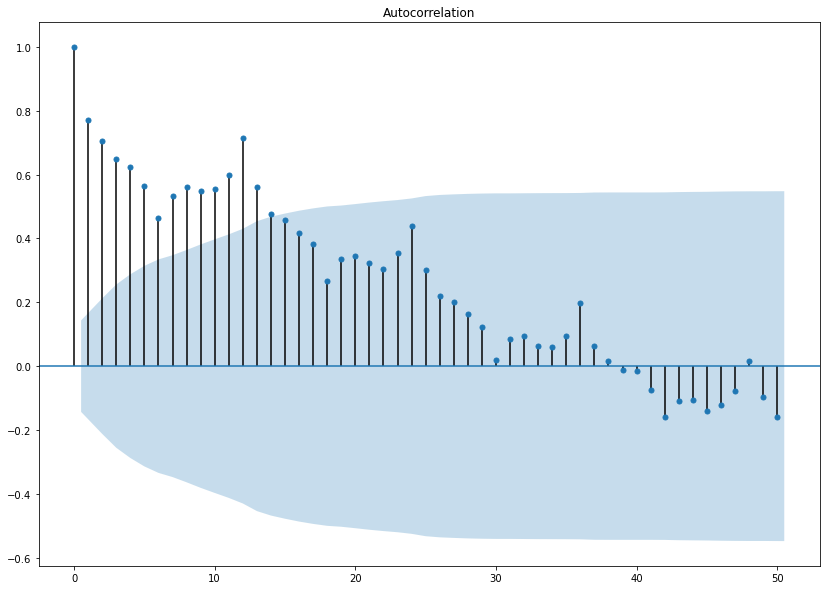

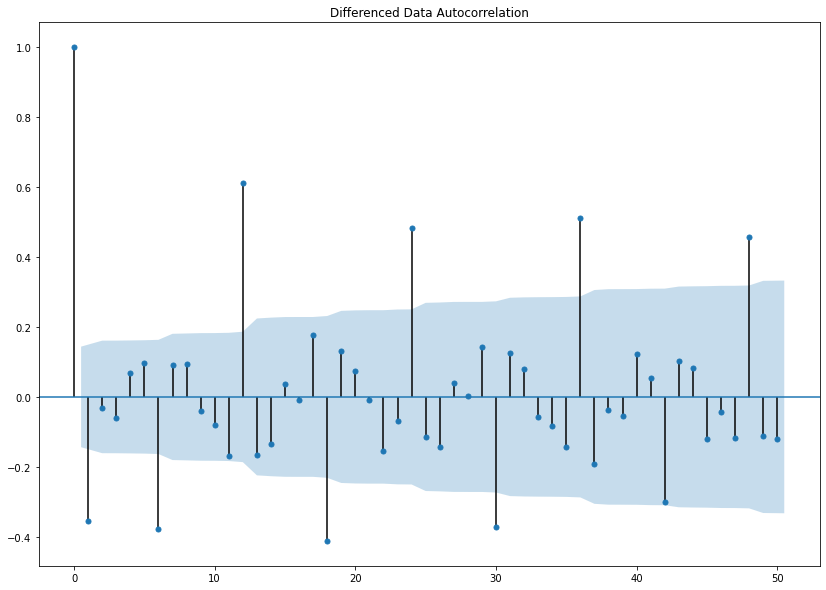

In [124]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Shoe_Sales'],lags=50)
plot_acf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

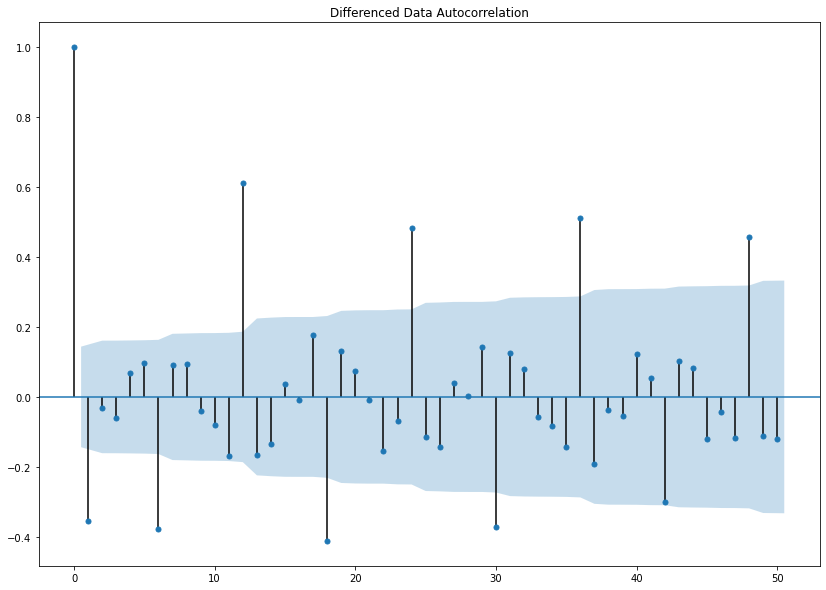

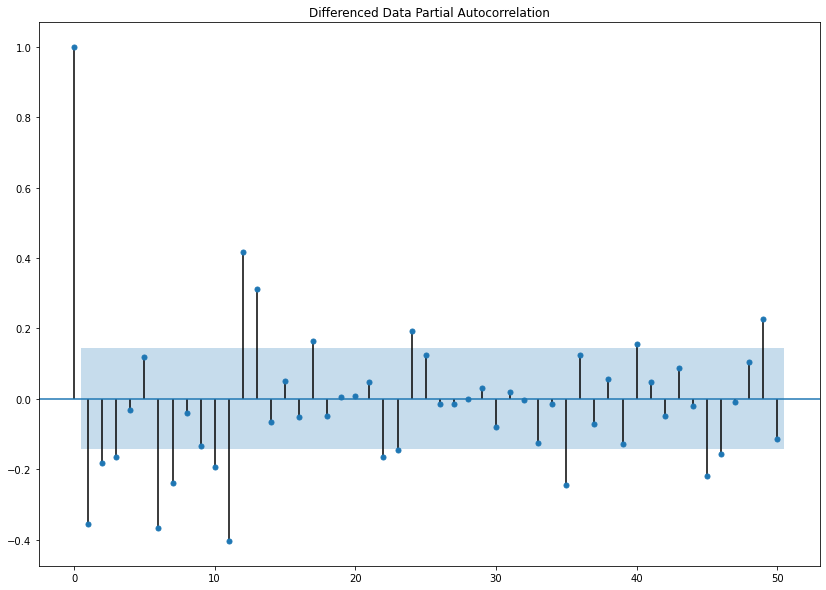

In [125]:
# ACF plot (not differenced)= 15= Q
# Q =0 ( since the cut off is post 12 )

# Plot PACF 

plot_acf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()


In [126]:
manual_ARIMA = ARIMA(train['Shoe_Sales'], order=(3,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Shoe_Sales   No. Observations:                  131
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -742.525
Method:                       css-mle   S.D. of innovations             69.914
Date:                Sat, 14 Aug 2021   AIC                           1497.050
Time:                        20:39:48   BIC                           1514.301
Sample:                    02-01-1980   HQIC                          1504.059
                         - 12-01-1990                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.1101      1.733      1.218      0.223      -1.286       5.507
ar.L1.D.Shoe_Sales     0.4975      0.129      3.853      0.000       0.244       0.751
ar.L2.D.Shoe_Sales  

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [127]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [129]:
rmse_man_arima = metrics.mean_squared_error(test['Shoe_Sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse_man_arima)

207.1104144638081


In [130]:
resultsArima1 = pd.DataFrame({'RMSE': [rmse_man_arima]}
                           ,index=['ARIMA_MAN(3,1,1)'])

resultsArima1

,RMSE
"ARIMA_MAN(3,1,1)",207.110414


In [131]:
resultsArima=pd.concat([resultsArima,resultsArima1])

In [132]:
resultsArima

,RMSE
"ARIMA(1,1,1)",203.242494
"ARIMA_MAN(3,1,1)",207.110414


In [134]:
# Sarima Model

import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [135]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [136]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1426.3361157238676
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1334.530538604141
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1426.0492095804898
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1385.5711564450703
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1319.6061076665999
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1323.6330116787822
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1322.9358084459157
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1312.6718075053677
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1476.0167777531703
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1405.2509947853916
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1312.4363431189763
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1414.502823737059
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1363.456851670487
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1299.1891900080482
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1309.8511217356254
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1311.0086078333554
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1288.9756630034
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC

In [137]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
80,"(2, 1, 2)","(2, 0, 2, 6)",1280.778661
26,"(0, 1, 2)","(2, 0, 2, 6)",1281.026602
53,"(1, 1, 2)","(2, 0, 2, 6)",1282.065372
17,"(0, 1, 1)","(2, 0, 2, 6)",1288.975663
50,"(1, 1, 2)","(1, 0, 2, 6)",1289.791749


In [138]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -633.513
Date:                           Sat, 14 Aug 2021   AIC                           1281.027
Time:                                   21:17:39   BIC                           1300.302
Sample:                                        0   HQIC                          1288.851
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3835      0.083     -4.621      0.000      -0.546      -0.221
ma.L2          0.0105      0.072      0.146

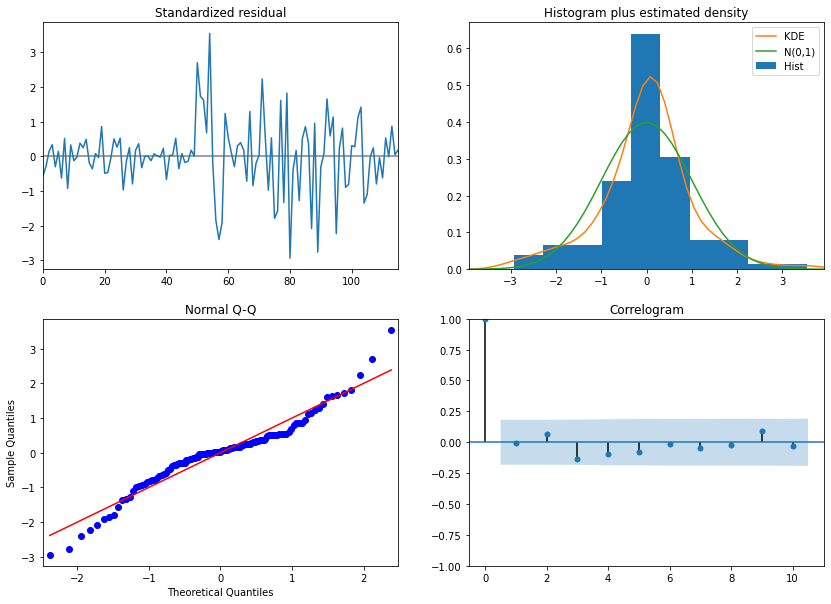

In [139]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [140]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [141]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,263.712908,56.468703,153.036284,374.389532
1,256.270711,66.338298,126.250036,386.291387
2,271.077106,75.196769,123.694146,418.460065
3,263.852268,83.116414,100.947089,426.757447
4,248.742216,90.344466,71.670316,425.814116


In [142]:
rmse = metrics.mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

59.78856341579464


In [143]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsArima = pd.concat([resultsArima,temp_resultsDf])

resultsArima

,RMSE
"ARIMA(1,1,1)",203.242494
"ARIMA_MAN(3,1,1)",207.110414
"SARIMA(0,1,2)(2,0,2,6)",59.788563


In [144]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -571.397
Date:                            Sat, 14 Aug 2021   AIC                           1158.794
Time:                                    21:17:41   BIC                           1179.949
Sample:                                         0   HQIC                          1167.365
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5074      0.496     -1.022      0.307      -1.480       0.466
ma.L1          0.1295      0.508   

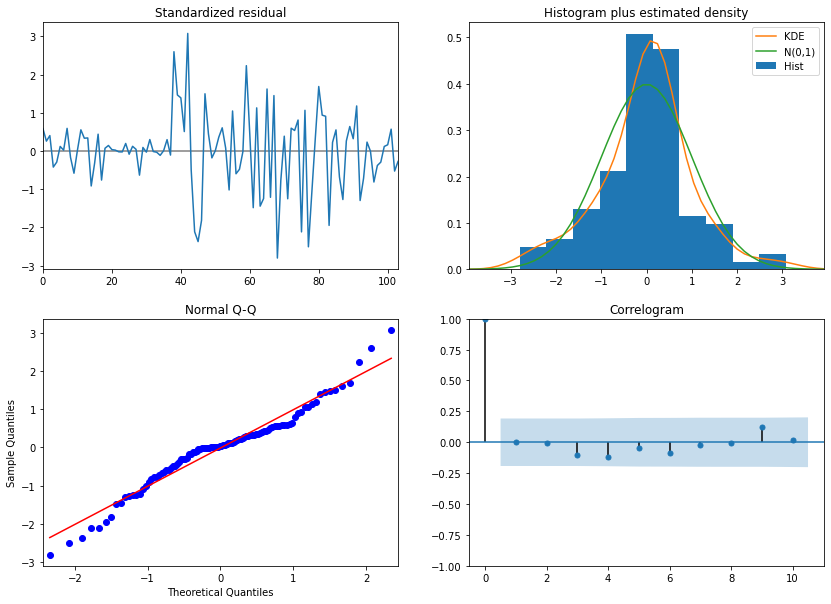

In [145]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [146]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [147]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,215.252773,56.498586,104.517579,325.987966
1,190.790734,66.540546,60.373660,321.207808
2,204.186602,78.748141,49.843082,358.530122
3,228.924681,87.623683,57.185418,400.663945
4,208.754994,96.460118,19.696637,397.813351


In [157]:
rmse = metrics.mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

55.17680690244637


In [158]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsArima = pd.concat([resultsArima,temp_resultsDf])

resultsArima

,RMSE
"ARIMA(1,1,1)",203.242494
"ARIMA_MAN(3,1,1)",207.110414
"SARIMA(0,1,2)(2,0,2,6)",59.788563
"SARIMA(0,1,0)(3,1,1,12)",100.209145
"SARIMA(1,1,2)(2,0,2,12)",55.176807


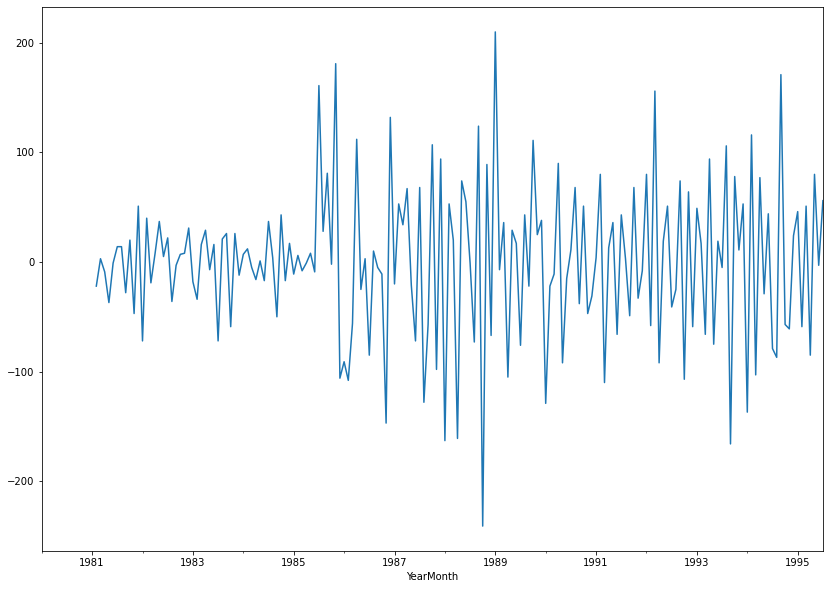

In [159]:
df['Shoe_Sales'].diff(12).diff().plot()

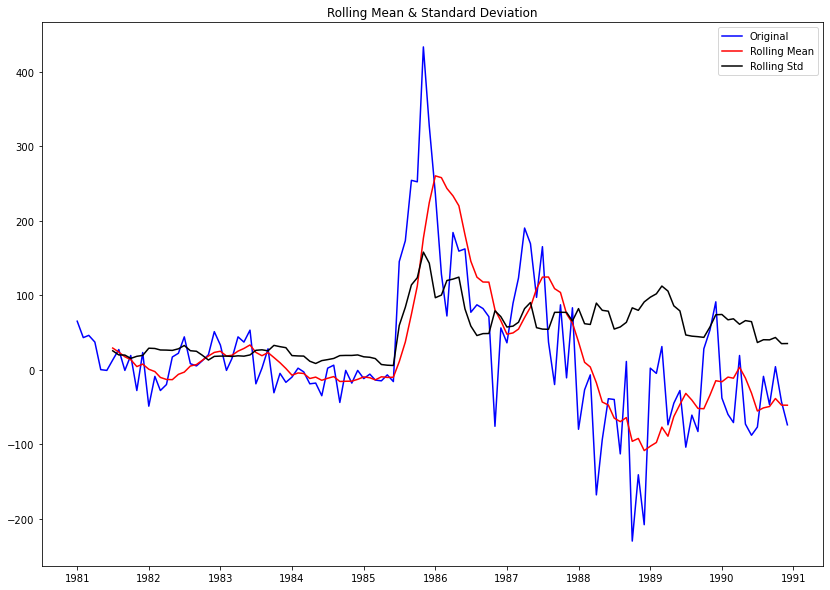

Results of Dickey-Fuller Test:
Test Statistic                  -3.093444
p-value                          0.027042
#Lags Used                       2.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64 



In [160]:
test_stationarity(train['Shoe_Sales'].diff(12).dropna())

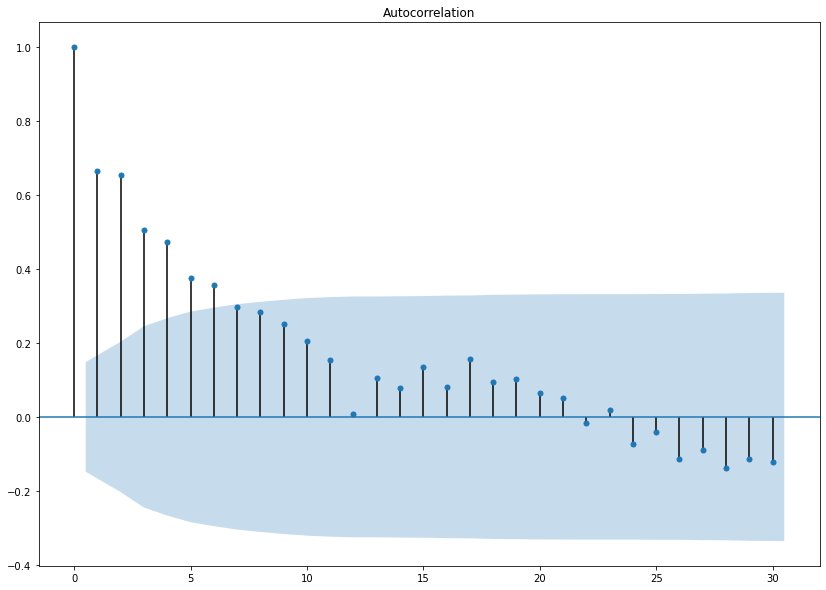

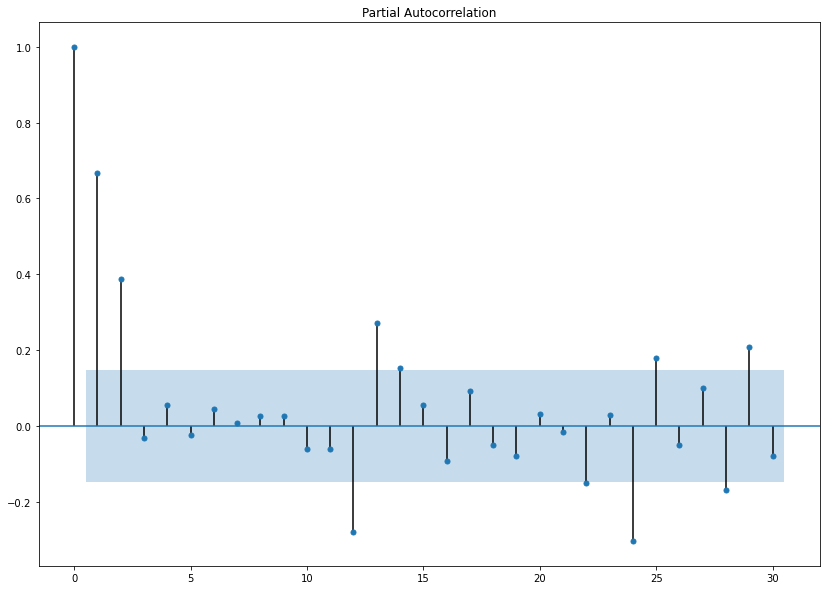

In [161]:
plot_acf((df['Shoe_Sales'].diff(12).dropna()),lags=30)
plot_pacf((df['Shoe_Sales'].diff(12).dropna()),lags=30);

In [162]:
manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(3,1,1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -445.663
Date:                            Sat, 14 Aug 2021   AIC                            909.326
Time:                                    21:18:27   BIC                            930.765
Sample:                                         0   HQIC                           917.921
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3793      0.263      1.440      0.150      -0.137       0.896
ar.L2          0.2663      0.186   

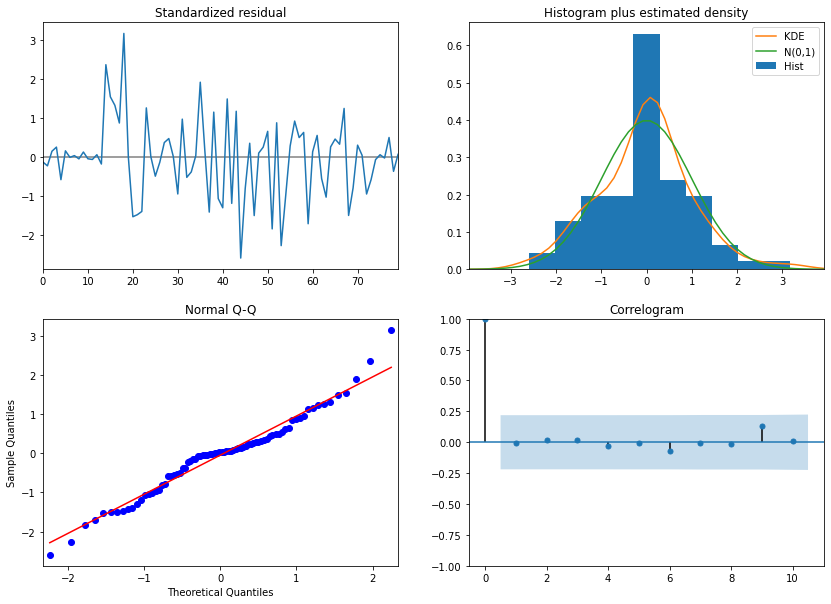

In [163]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [164]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [165]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,253.869732,60.446173,135.397410,372.342053
1,234.018189,70.108658,96.607743,371.428634
2,245.480151,81.678686,85.392869,405.567434
3,266.601150,87.437952,95.225913,437.976387
4,251.787993,92.991601,69.527804,434.048182


In [166]:
rmse = metrics.mean_squared_error(test['Shoe_Sales'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

100.20914533983593


In [167]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(3,1,1,12)'])


resultsArima = pd.concat([resultsArima,temp_resultsDf])

resultsArima

,RMSE
"ARIMA(1,1,1)",203.242494
"ARIMA_MAN(3,1,1)",207.110414
"SARIMA(0,1,2)(2,0,2,6)",59.788563
"SARIMA(0,1,0)(3,1,1,12)",100.209145
"SARIMA(1,1,2)(2,0,2,12)",55.176807
"SARIMA(0,1,0)(3,1,1,12)",100.209145


In [169]:
auto_SARIMA_12_full = sm.tsa.statespace.SARIMAX(df['Shoe_Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12_full = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12_full.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -860.345
Date:                            Sat, 14 Aug 2021   AIC                           1736.691
Time:                                    21:27:47   BIC                           1761.242
Sample:                                         0   HQIC                          1746.661
                                            - 187                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5737      0.334     -1.716      0.086      -1.229       0.082
ma.L1          0.0573      0.354   

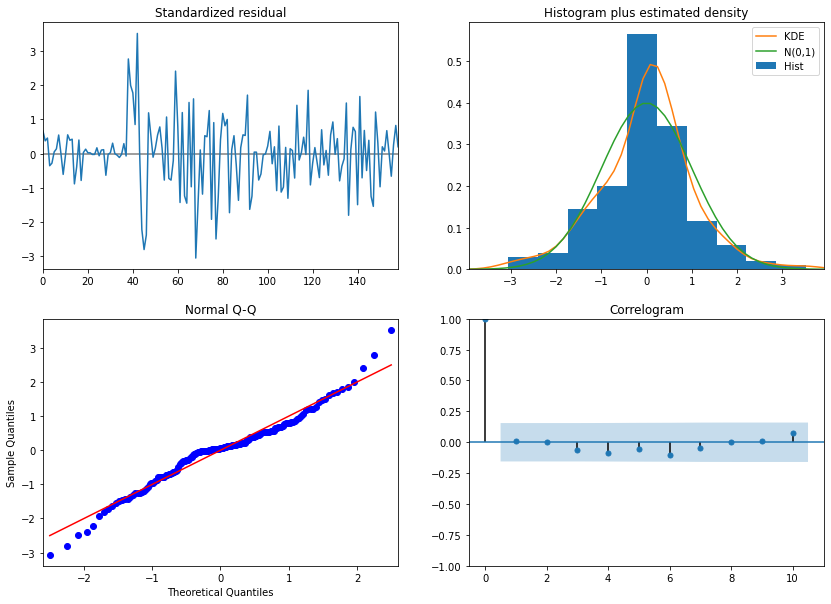

In [171]:
results_auto_SARIMA_12_full.plot_diagnostics()
plt.show()

In [173]:
predicted_manual_SARIMA_12_full_data = results_auto_SARIMA_12_full.get_forecast(steps=12)

In [174]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,261.953418,51.345259,161.318559,362.588277
1,279.768180,57.034376,167.982858,391.553502
2,275.044550,65.690764,146.293019,403.796081
3,327.173956,71.464267,187.106567,467.241345
4,420.496329,77.777535,268.055163,572.937496


In [176]:
rmse = metrics.mean_squared_error(df['Shoe_Sales'],results_auto_SARIMA_12_full.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 50.73409026721828


In [185]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-31', freq='M'))

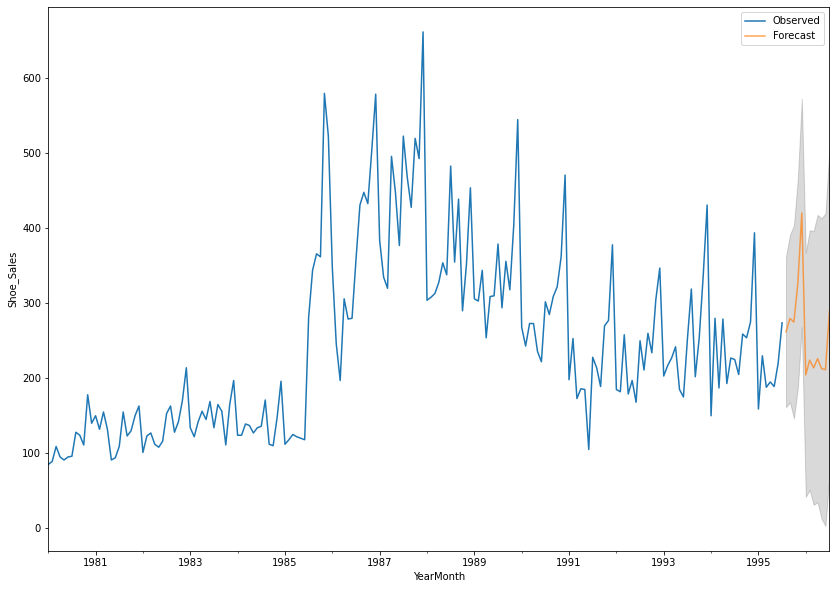

In [188]:
axis = df['Shoe_Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Shoe_Sales')
plt.legend(loc='best')
plt.show()

In [189]:
resultsArima

,RMSE
"ARIMA(1,1,1)",203.242494
"ARIMA_MAN(3,1,1)",207.110414
"SARIMA(0,1,2)(2,0,2,6)",59.788563
"SARIMA(0,1,0)(3,1,1,12)",100.209145
"SARIMA(1,1,2)(2,0,2,12)",55.176807
"SARIMA(0,1,0)(3,1,1,12)",100.209145


In [192]:
resultsArima_full = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA _Full(1, 1, 2)(2, 0, 2, 12)'])


resultsArima = pd.concat([resultsArima,resultsArima_full])

resultsArima

,RMSE
"ARIMA(1,1,1)",203.242494
"ARIMA_MAN(3,1,1)",207.110414
"SARIMA(0,1,2)(2,0,2,6)",59.788563
"SARIMA(0,1,0)(3,1,1,12)",100.209145
"SARIMA(1,1,2)(2,0,2,12)",55.176807
"SARIMA(0,1,0)(3,1,1,12)",100.209145
"SARIMA(1, 1, 2)(2, 0, 2, 12)",50.734090
"SARIMA _Full(1, 1, 2)(2, 0, 2, 12)",50.734090
